## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, 
    recall_score, classification_report, confusion_matrix
)

## Read Data

In [2]:
data = pd.read_csv('data/SMSSpamCollection.txt', sep='\t',names=["label","message"])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Cleaning and Preprocessing

In [3]:
stemmer = PorterStemmer()

In [4]:
corpus = []

for message in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['message'][message])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

## Create Bag of Words

In [5]:
count_vectorizer = CountVectorizer(max_features=2500, binary=True, ngram_range=(1,2))
X = count_vectorizer.fit_transform(corpus).toarray()
X.shape

(5572, 2500)

In [6]:
# X

### Vocabulary

In [7]:
count_vectorizer.vocabulary_

{'go': 802,
 'point': 1615,
 'crazi': 451,
 'avail': 122,
 'bugi': 229,
 'great': 860,
 'world': 2428,
 'la': 1083,
 'cine': 339,
 'got': 848,
 'wat': 2336,
 'ok': 1478,
 'lar': 1093,
 'joke': 1054,
 'wif': 2393,
 'free': 716,
 'entri': 614,
 'wkli': 2417,
 'comp': 395,
 'win': 2398,
 'cup': 466,
 'final': 678,
 'st': 1975,
 'may': 1265,
 'text': 2077,
 'receiv': 1701,
 'question': 1669,
 'std': 1988,
 'txt': 2196,
 'rate': 1681,
 'appli': 86,
 'free entri': 723,
 'entri wkli': 616,
 'std txt': 1989,
 'txt rate': 2204,
 'rate appli': 1682,
 'dun': 579,
 'say': 1798,
 'earli': 585,
 'alreadi': 55,
 'nah': 1389,
 'think': 2096,
 'goe': 823,
 'usf': 2271,
 'live': 1162,
 'around': 98,
 'though': 2107,
 'freemsg': 736,
 'hey': 918,
 'darl': 486,
 'week': 2362,
 'word': 2423,
 'back': 139,
 'like': 1148,
 'fun': 753,
 'still': 1990,
 'tb': 2057,
 'xxx': 2464,
 'send': 1827,
 'even': 623,
 'brother': 219,
 'speak': 1958,
 'treat': 2174,
 'per': 1546,
 'request': 1737,
 'set': 1849,
 'callert

## Dependent Feature

In [8]:
y = pd.get_dummies(data['label'])
y = y.iloc[:, 0].values
y

array([ True,  True, False, ...,  True,  True,  True])

## Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20
)

## Modeling

In [10]:
model = MultinomialNB()

In [11]:
model.fit(X_train, y_train)

MultinomialNB()

### Prediction

In [12]:
prediction = model.predict(X_test)

### Evaluation

In [13]:
accuracy = accuracy_score(y_true=y_test, y_pred=prediction)
precision = precision_score(y_true=y_test, y_pred=prediction)
recall = recall_score(y_true=y_test, y_pred=prediction)
f1 = f1_score(y_true=y_test, y_pred=prediction)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9775784753363229
Precision: 0.9824380165289256
Recall: 0.9916579770594369
F1-Score: 0.987026466009341


In [14]:
print(classification_report(y_true=y_test, y_pred=prediction))

              precision    recall  f1-score   support

       False       0.95      0.89      0.92       156
        True       0.98      0.99      0.99       959

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



<Axes: >

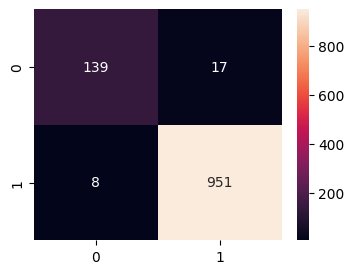

In [15]:
plt.figure(figsize=(4,3))
matrix = confusion_matrix(y_true=y_test, y_pred=prediction)
sns.heatmap(matrix, annot=True, fmt='1.0f')